## Question 1: Gaussian Quadrature
\begin{equation}
    \mathrm{erf}(3) = \frac{2}{\sqrt{\pi}} \int_0^3 e^{-t^2}\mathrm{d}t
\end{equation}

In [37]:
#PART A
# Andrew Hardy
#i) 
#import packages
import numpy as np
from scipy.special import erf
from gaussxw import gaussxw
import matplotlib.pyplot as plt


In [57]:
# defining variables taken from Q2.A from Lab 2, done by Brayden.
#define a function for Trapezoid rule 
def Trapezoid(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function 
    the trapezoid rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = 0.5*function(f_a) + 0.5*function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,i_N):
        f_s += function(f_a+j*f_h)
        
    f_integral = f_h*f_s
    return f_integral

#define a function for Simpson's rule
def Simpson(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Simpson's rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = function(f_a) + function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,i_N,2): #loop over odd terms
        f_s += 4*function(f_a+k*f_h)
    for k in range(2,i_N,2): #loop over even terms
        f_s += 2*function(f_a+k*f_h)
        
    f_integral = f_h*f_s/3
    return f_integral
def Gaussian(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w

    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k])
    return f_s
    print(f_s)


In [58]:
#define function to be integrated
def errorfunction(f_t):
    return 2/np.sqrt(np.pi)*np.exp(-f_t**2)

In [59]:
i_length = 1000-8
a_erf_trap = np.empty(i_length)
a_erf_simp = np.empty(i_length)
a_erf_gauss = np.empty(i_length)
print(i_length)
print(len(a_erf_gauss))
for i in range(8,1000):
    print(i)
    a_erf_trap[i-8] = Trapezoid(errorfunction, i,0,3)
    a_erf_simp[i-8] = Simpson(errorfunction, i, 0,3)
    a_erf_gauss[i-8] = Gaussian(errorfunction, i, 0,3)

992
992
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

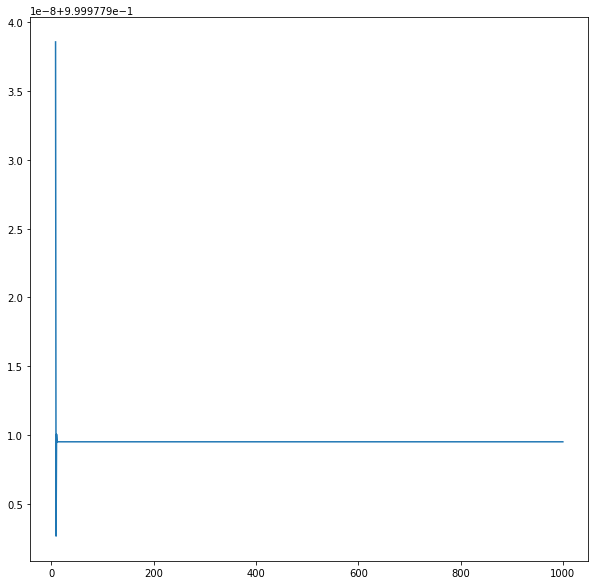

In [69]:
a_num = np.linspace(8,1000,1000-8)

plt.figure(figsize =(10,10))
#plt.ylim(-0.5,105)
plt.plot(a_num, a_erf_gauss)